In [18]:
#Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import operator

In [19]:
#Le damos un formato legible al dataset para que lo interprete pandas
df = pd.read_csv('diabetes.csv') 
df.head()
#embarazos/glucosa/presion sanguinea/grosor de piel/insulina/indice de masa corporal/historial familiar/edad
#1=diabates, 0=no-diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#vemos cuantas filas y cuantas columnas tenemos en el dataset
df.shape

(768, 9)

In [21]:
#Reemplazamos los 0 con NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [22]:
#Visualizamos el cambio
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
#df.describe()

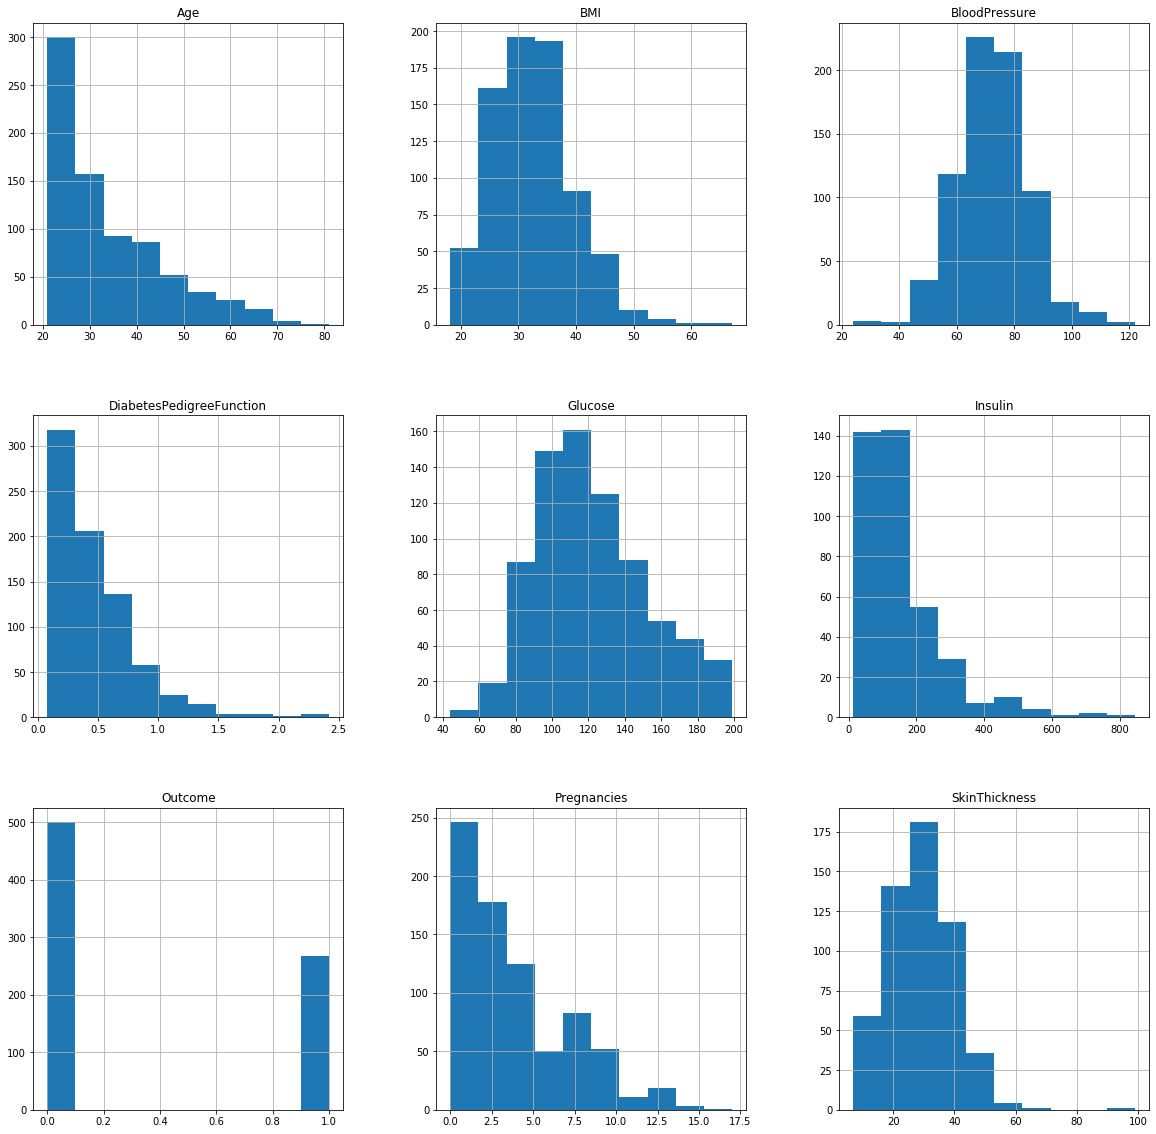

In [24]:
p = df.hist(figsize = (20,20))

In [25]:
#como el modelo necesita valores numericos, reemplazamos a todos los NaN con:
#mean / promedio si tiene distribucion normal
#median / media si tiene distribucion asimetrica
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)



In [26]:
#visualizamos el cambio
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


In [27]:
#decimos quienes van a ser las features(x) y quienes van a ser los targets(y)
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0       35.00000    125.0  33.6   
1              1     85.0           66.0       29.00000    125.0  26.6   
2              8    183.0           64.0       29.15342    125.0  23.3   
3              1     89.0           66.0       23.00000     94.0  28.1   
4              0    137.0           40.0       35.00000    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0       48.00000    180.0  32.9   
764            2    122.0           70.0       27.00000    125.0  36.8   
765            5    121.0           72.0       23.00000    112.0  26.2   
766            1    126.0           60.0       29.15342    125.0  30.1   
767            1     93.0           70.0       31.00000    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [28]:
#Separamos el dataset en un 70% para generar un modelo y otro 30% para entrenarlo
#mostramos cuantas filas pertenecen a cada uno
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [29]:
#Iteramos el algoritmo de Knn con K de 1 a 40 para ver con que valor de K obtenemos el mejor score posible
k_range = range(1,40)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
b=max(scores.items(), key=operator.itemgetter(1))[0]
print(b)

15


Text(0, 0.5, 'Testing Accuracy')

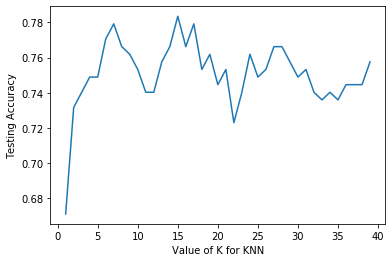

In [30]:
#Se grafica la relación entre K y su exactitud o puntuación
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [31]:
#Procedemos con el algoritmo Knn con K=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)


#Printeamos el score
print(knn.score(X_test,y_test))




0.7835497835497836


In [32]:
# Creamos un dataframe que compare el valor actual con el valor predecido para comparar los valores
close_predictions_knn = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted_knn': close_predictions_knn})
#print(df1.mean())
print(df1.groupby('Predicted_knn').count())
df1 = df1.tail(25)
print(df1)

               Actual
Predicted_knn        
0                 150
1                  81
     Actual  Predicted_knn
458       1              1
56        1              1
612       1              1
470       0              1
323       1              0
439       0              0
418       0              0
537       0              0
192       1              1
623       0              0
492       0              0
416       0              0
218       1              0
429       1              0
691       1              1
390       0              0
376       0              0
398       0              0
647       1              1
183       0              0
747       0              0
520       0              0
335       0              1
312       1              0
1         0              0


In [33]:
#Utilizamos el modelo de naive bayes classifier
nbc = GaussianNB()
nbc.fit(X_train,y_train)
y_pred1=nbc.predict(X_test)
#printeamos el score
print(nbc.score(X_test,y_test))


0.7186147186147186


In [18]:
#comparamos nbc con valores reales
close_predictions_nbc = nbc.predict(X_test)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted_nbc': close_predictions_nbc})
#print(df2.mean())
print(df2.groupby('Predicted_nbc').count())
df2 = df2.tail(25)
print(df2)

               Actual
Predicted_nbc        
0                 149
1                  82
     Actual  Predicted_nbc
206       1              1
207       1              1
208       1              1
209       0              1
210       1              1
211       0              0
212       0              0
213       0              0
214       1              1
215       0              0
216       0              0
217       0              0
218       1              0
219       1              0
220       1              1
221       0              0
222       0              0
223       0              0
224       1              1
225       0              0
226       0              1
227       0              0
228       0              1
229       1              0
230       0              0


In [19]:
#comparamos ambos algoritmos con valores reales
df1['Predicted_nbc']= df2['Predicted_nbc']
print(df1)

     Actual  Predicted_knn  Predicted_nbc
206       1              1              1
207       1              1              1
208       1              1              1
209       0              1              1
210       1              0              1
211       0              0              0
212       0              0              0
213       0              0              0
214       1              1              1
215       0              0              0
216       0              0              0
217       0              0              0
218       1              0              0
219       1              0              0
220       1              1              1
221       0              0              0
222       0              0              0
223       0              0              0
224       1              1              1
225       0              0              0
226       0              0              1
227       0              0              0
228       0              1        

In [20]:
##embarazos+/glucosa+/presionSanguinea?/grosorDePiel/insulina-/indice de masa corporal+/historialFamiliar+/edad+
print(nbc.predict([[3, 173, 82, 48, 465, 38.4, 2.137, 15]])) #1=tiene diabetes 0=no tiene diabetes

[1]


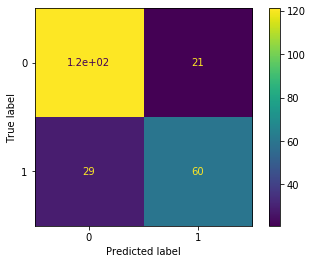

In [21]:
#matriz de confusion knn // 150 0s  81 1s
#121 casos donde el 0 deberia haber dado 0
#60 casos donde el 1 deberia haber dado 1
#29 casos donde el 0 deberia haber sido un 1
#21 casos donde el 1 deberia haber sido un 0
plot_confusion_matrix(knn, X_test, y_test)
plt.show()  

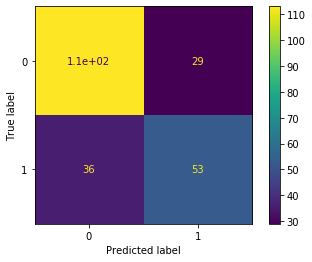

In [22]:
#matriz de confusion nbc   //149 0s  82 1s
#113 casos donde el 0 deberia haber dado 0
#53 casos donde el 1 deberia haber dado 1
#29 casos donde el 1 deberia haber sido un 0
#36 casos donde el 0 deberia haber sido un 1
plot_confusion_matrix(nbc, X_test, y_test)
plt.show()  